# Analysis of a binary image

This sample code illustrate how to analyze a 2D binary image by persistent homology by using the software HomCloud, which is a data analysis software based on persistent homology. The software is developed mainly by Ippei Obayashi in Hiraoka Laboratory.

1. How to compute a PD (Persistence Diagram) from a image
2. How to visualize the PD
3. How to output birth-death pairs in the text format
4. How to apply basic inverse analysis called birth pixels and death pixels

The PD is computed from a filtration constructed by signed distance transform.
This means that the black area in the binary image is shrinked and expanded and
HomCloud captures the information of the appearance and disappearance of 
connected components and holes. 

Ref.

https://homcloud.dev/index.html

https://arxiv.org/abs/1706.10082 .

## How to compute a PD


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from IPython.display import display, Image

%matplotlib inline

The example image file is `binary-image.png`. First, we display the image.

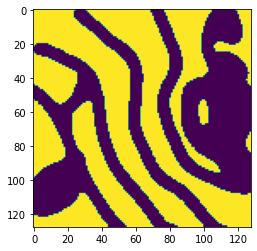

In [2]:
image = imageio.imread("./data_for_2d_analysis/binary-image.png", as_gray=True)
plt.imshow(image)

### Preprocessing - binarization-

The pixel values are 0 or 255. That means that the image is already binarized. HomCloud accepts a boolean array as a binary image,
we need to convert `image` into a boolean array.
numpy's comparison operators make such a booelan array. We use 128 as the threshold for binarization.
In this tutorial, we will focus on the black area, so `image < 128` is used.

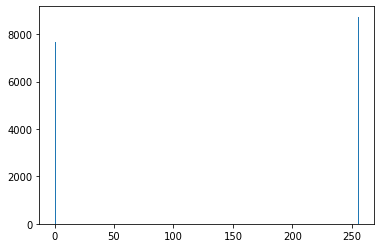

In [3]:
plt.hist(np.ravel(image), range=(0,256), bins=256); None

In [4]:
binary_image = image < 128

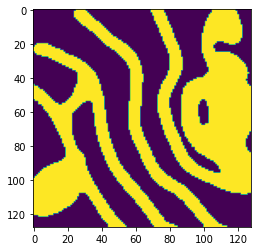

In [5]:
plt.imshow(binary_image)

### PD computation

In [6]:
# Load HomCloud library. "hc" is an alias of hocmloud.interface
import homcloud.interface as hc

In [7]:
hc.PDList.from_bitmap_levelset(hc.distance_transform(binary_image, signed=True), save_to="binary-image.pdgm")

PDList(path=binary-image.pdgm)

`hc.PDList.from_bitmap_distance_function` can be used to compute PD.
The file whose name is `binary-image.pdgm` is generated. This file has information about persistence diagrams.
You can specify the file name by `save_to=...` argument.
`signed=True` is used to shrink and expand the black area (This option should be always True unless you have any special reason).

The following code load the file.

In [8]:
pdlist = hc.PDList("binary-image.pdgm")

the return value of `hc.PDList.from_bitmap_distance_function` is the same as `pdlist`, so you don't need to load the file
in this case.
Computing PDs is relatively expensive, it is recommended that the result is saved into a file and the result is loaded 
when analyzing.

## How to visualize a PD

Next, we visualize the 0th PD. We investigate the black connected components in the input image.

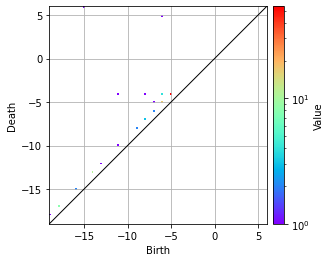

In [9]:
pdlist.dth_diagram(0).histogram().plot(colorbar={"type":"log"})

`pdlist` has the PDs of all degree, we get the 0th PD by `dth_diagram(0)`, construct a 2D histogram by `.histogram()`, and
plot the histogram by `.plot(...)`. We specify the colorbar spec by `colorbar={"type":"log"}`, this means that log-scale colorbar is used.
This is the same way as a pointcloud.

Some small points appear in the figure. In fact, we use the manhattan distance for the computation
and all birth times and death times are integer values for that reason. Therefore 
the resolution is too fine for the visualization. Now we adjust the resolution.
The arguments `x_range=(-20.5, 7.5), x_bins=28` change the range and the number of bins.
The size of each bin is adjusted to 1x1 and the center of each bin is adjusted to an integer point.


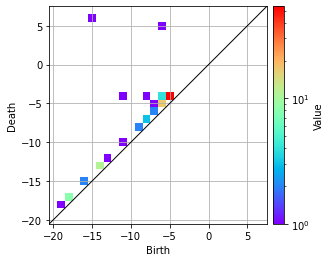

In [10]:
pdlist.dth_diagram(0).histogram(x_range=(-20.5, 7.5), x_bins=28).plot(colorbar={"type":"log"})

Since the `y_range` and `y_bins` arguments are not given, the range and the number of bins in y-axis are set as same as x-axis.

To save the figure into a file, `savefig` method in `matplotlib` is available.

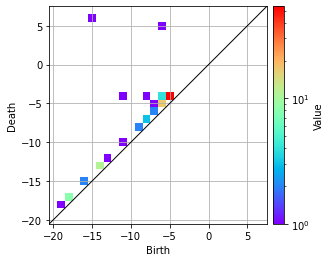

In [11]:
pdlist.dth_diagram(0).histogram(x_range=(-20.5, 7.5), x_bins=28).plot(colorbar={"type":"log"})
plt.savefig("binary-image-pd0.png")

## Inverse analysis (birth pixels and death pixels)
You can see the birth times and death times by attribtues `births` and `deaths`.

From the following PD, you see that many birth-death pairs are concentrated at (-5, -4).

Now we try to analyze these pairs. We use birth pixels and death pixels.

In HomCloud, we get birth positions by `birth_positions` attribute.

In [12]:
pd = pdlist.dth_diagram(0)
pd.births, pd.deaths

(array([-19., -18., -18., -18., -18., -18., -18., -18., -18., -16., -16.,
        -14., -14., -14., -14., -14., -14., -14., -14., -14., -14., -14.,
        -13., -11.,  -9.,  -9.,  -8.,  -8.,  -8.,  -7.,  -7.,  -6.,  -6.,
         -6.,  -6.,  -6.,  -6.,  -6.,  -6.,  -6.,  -6.,  -6.,  -6.,  -6.,
         -6.,  -6.,  -7.,  -6.,  -6.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,
         -5.,  -6.,  -5., -11.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,
         -5.,  -5.,  -5.,  -5.,  -5.,  -8.,  -5.,  -5.,  -5.,  -5.,  -5.,
         -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -6.,  -5.,  -5.,  -5.,  -5.,
         -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,
         -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -6.,  -6.,  -5.,  -5.,  -6.,
        -15.]),
 array([-18., -17., -17., -17., -17., -17., -17., -17., -17., -15., -15.,
        -13., -13., -13., -13., -13., -13., -13., -13., -13., -13., -13.,
        -12., -10.,  -8.,  -8.,  -7.,  -7.,  -7.,  -6.,  -6.,  -5.,  -5.,
         -5.,  -5.,  -

In [13]:
pd.birth_positions

[[57, 121],
 [47, 112],
 [48, 113],
 [49, 114],
 [50, 115],
 [51, 116],
 [52, 117],
 [53, 118],
 [46, 111],
 [73, 111],
 [74, 110],
 [40, 112],
 [83, 113],
 [84, 114],
 [85, 115],
 [86, 116],
 [87, 117],
 [88, 118],
 [89, 119],
 [90, 120],
 [91, 121],
 [92, 122],
 [37, 114],
 [9, 112],
 [75, 98],
 [74, 97],
 [47, 96],
 [50, 94],
 [71, 95],
 [48, 34],
 [68, 93],
 [26, 55],
 [28, 105],
 [36, 30],
 [51, 27],
 [51, 36],
 [52, 26],
 [53, 25],
 [54, 24],
 [55, 23],
 [56, 22],
 [57, 21],
 [58, 20],
 [59, 12],
 [59, 19],
 [58, 11],
 [62, 15],
 [103, 31],
 [104, 32],
 [9, 35],
 [10, 36],
 [11, 37],
 [18, 45],
 [19, 46],
 [20, 48],
 [21, 49],
 [25, 54],
 [25, 103],
 [7, 111],
 [28, 17],
 [30, 58],
 [31, 23],
 [32, 25],
 [27, 15],
 [44, 79],
 [49, 1],
 [50, 3],
 [48, 0],
 [73, 81],
 [75, 82],
 [82, 85],
 [44, 32],
 [84, 86],
 [86, 87],
 [87, 67],
 [87, 88],
 [91, 69],
 [92, 48],
 [93, 70],
 [94, 49],
 [94, 71],
 [94, 95],
 [95, 50],
 [98, 74],
 [96, 51],
 [99, 53],
 [42, 80],
 [102, 79],
 [103, 8

The above attributes have the array of birth times, the array of death times, the array of birth positions, and the array of death positions. You sometimes want an object that has birth and death times and birth and death positions. hc.Pair class holds the information. pd.pairs() returns the list of Pair objects.

In [14]:
pairs = pd.pairs()

In [15]:
pairs[0].birth_time(), pairs[0].death_time()

(-19.0, -18.0)

In [16]:
pairs[0].birth_position, pairs[0].death_position

([57, 121], [56, 121])

Now we select all (-5, -4) pairs from the list. 
We plot birth positions of these birth-death pairs on the input image.
`draw_birthdeath_pixels_2d` is available for the purpose.

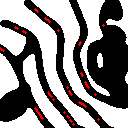

In [17]:
pairs_m5_m4 = [pair for pair in pairs if pair.birth_time() == -5 and pair.death_time() == -4]

birth_pixels_image = hc.draw_birthdeath_pixels_2d(
    pairs_m5_m4, "./data_for_2d_analysis/binary-image.png", draw_birth=True
)
display(birth_pixels_image)